<a href="https://colab.research.google.com/github/tanmayggsvp/PCA-Face-recognition/blob/main/PCA_Face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

loading the trainining set and testing set matrix

In [ ]:
mat = scipy.io.loadmat('/content/train_set.mat')
mat2 = scipy.io.loadmat('/content/test_set.mat')

printing mat to get idea of images matrix



In [ ]:
print(mat)
print(mat2)

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Mon Apr 10 23:29:46 2023', '__version__': '1.0', '__globals__': [], 'data': array([[ 39,  44,  53, ...,  29,  26,  29],
       [ 63,  53,  35, ...,  41,  10,  24],
       [ 64,  76,  80, ...,  35,  37,  39],
       ...,
       [111, 114, 112, ...,  88,  86,  92],
       [110, 112, 113, ...,  92,  87,  90],
       [111, 111, 110, ...,  88,  79,  90]], dtype=uint8), 'labels': array([[ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
         2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
         4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
         6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,
         8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,
        10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11,
        12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13,
        14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 

converting the data matrix into numpy arrays

In [ ]:
train_mat = np.array(mat['data'])
test_mat = np.array(mat2['data'])
train_mat.shape
test_mat.shape

(80, 10304)

putting labels for each ith image to identify the person

In [ ]:
labels_with_index = {}
count2 = 0;
for i in mat['labels'][0]:
  labels_with_index[count2] = i;
  count2 = count2+1;
print(labels_with_index)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2, 23: 2, 24: 3, 25: 3, 26: 3, 27: 3, 28: 3, 29: 3, 30: 3, 31: 3, 32: 4, 33: 4, 34: 4, 35: 4, 36: 4, 37: 4, 38: 4, 39: 4, 40: 5, 41: 5, 42: 5, 43: 5, 44: 5, 45: 5, 46: 5, 47: 5, 48: 6, 49: 6, 50: 6, 51: 6, 52: 6, 53: 6, 54: 6, 55: 6, 56: 7, 57: 7, 58: 7, 59: 7, 60: 7, 61: 7, 62: 7, 63: 7, 64: 8, 65: 8, 66: 8, 67: 8, 68: 8, 69: 8, 70: 8, 71: 8, 72: 9, 73: 9, 74: 9, 75: 9, 76: 9, 77: 9, 78: 9, 79: 9, 80: 10, 81: 10, 82: 10, 83: 10, 84: 10, 85: 10, 86: 10, 87: 10, 88: 11, 89: 11, 90: 11, 91: 11, 92: 11, 93: 11, 94: 11, 95: 11, 96: 12, 97: 12, 98: 12, 99: 12, 100: 12, 101: 12, 102: 12, 103: 12, 104: 13, 105: 13, 106: 13, 107: 13, 108: 13, 109: 13, 110: 13, 111: 13, 112: 14, 113: 14, 114: 14, 115: 14, 116: 14, 117: 14, 118: 14, 119: 14, 120: 15, 121: 15, 122: 15, 123: 15, 124: 15, 125: 15, 126: 15, 127: 15, 128: 16, 129: 16, 130: 16, 131: 16, 1

plotting (5 * 8) subgrid of images using imshow function and each figure corresponds to unique person


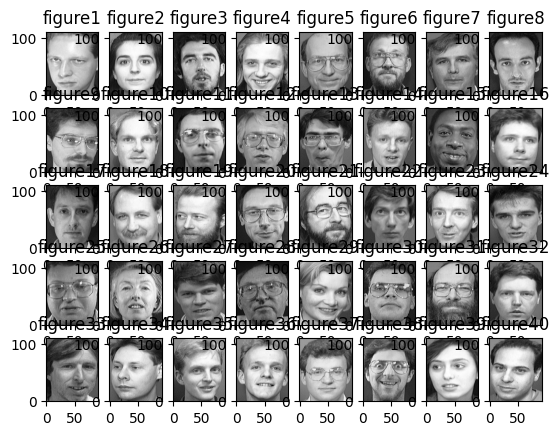

In [ ]:
figure, axs = plt.subplots(5, 8)
count = 0
count1 = 0
for i in range(1,41):
  pic_array = np.flip(train_mat[8*i-1])
  fig = pic_array.reshape((112,92))
  if count1%8==0 and count1!=0:
    count1=0
    count = count+1;
  axs[count,count1].imshow(fig,origin="lower",cmap="gray")
  axs[count,count1].set_title(f'figure{i}')
  count1=count1+1;

centering the data of X matrix

In [ ]:
mean_image = []
for i in range(train_mat.shape[1]):
  mean1 = np.mean(train_mat[:,i])
  mean_image.append(mean1)
mean_image = np.array(mean_image)

plotting mean-image

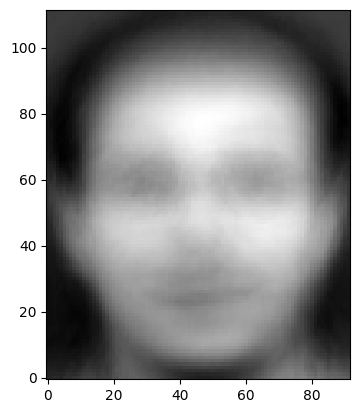

In [ ]:
plt.imshow(np.flip(mean_image.reshape(112,92)),origin="lower",cmap="gray")

centering the train and test data

In [ ]:
centered_train = train_mat - mean_image

In [ ]:
centered_test = test_mat - mean_image

plotting some of the centered images

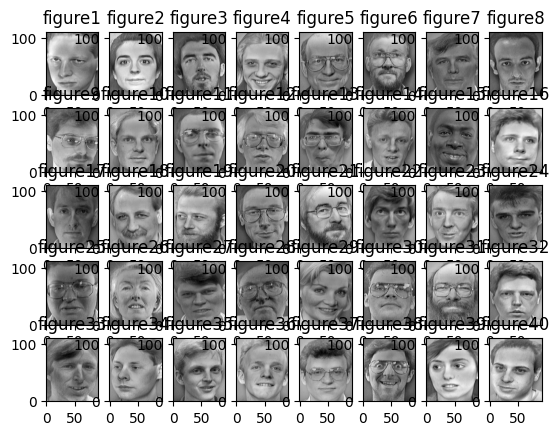

In [ ]:
# plt.title('images of centered train')
figure, axs = plt.subplots(5, 8)
count = 0
count1 = 0
for i in range(1,41):
  pic_array = np.flip(centered_train[8*i-1])
  fig = pic_array.reshape((112,92))
  if count1%8==0 and count1!=0:
    count1=0
    count = count+1;
  axs[count,count1].imshow(fig,origin="lower",cmap="gray")
  axs[count,count1].set_title(f'figure{i}')
  count1=count1+1;

plotting centered train

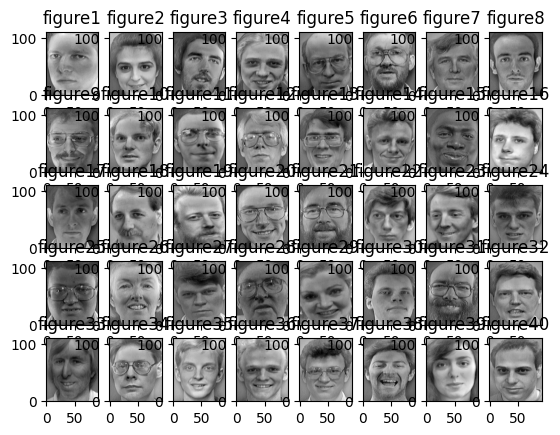

In [ ]:
# plt.title('images of centered train')
figure, axs = plt.subplots(5, 8)
count = 0
count1 = 0
for i in range(1,41):
  pic_array = np.flip(centered_test[2*i-1])
  fig = pic_array.reshape((112,92))
  if count1%8==0 and count1!=0:
    count1=0
    count = count+1;
  axs[count,count1].imshow(fig,origin="lower",cmap="gray")
  axs[count,count1].set_title(f'figure{i}')
  count1=count1+1;

finding eigen vectors for the covariance matrix.

for finding eigen vectors we use SV decomposition as number of features is much much larger than number of samples

In [ ]:
 U, S, V = np.linalg.svd(centered_train)
 print(S)

[2.98786101e+04 2.60172085e+04 1.86587769e+04 1.71171729e+04
 1.62203146e+04 1.29079091e+04 1.11660247e+04 1.11123120e+04
 1.01282304e+04 9.58423726e+03 8.62055599e+03 8.33030815e+03
 7.65703529e+03 7.37588695e+03 7.10548079e+03 7.04148708e+03
 6.75095900e+03 6.49302936e+03 6.05853085e+03 5.94307345e+03
 5.90939673e+03 5.68204537e+03 5.63794708e+03 5.43889303e+03
 5.21968781e+03 5.05722077e+03 5.04037059e+03 5.00128044e+03
 4.90294584e+03 4.82971202e+03 4.76731514e+03 4.64729136e+03
 4.57876913e+03 4.54186871e+03 4.38283219e+03 4.33050769e+03
 4.26559246e+03 4.17713074e+03 4.07168891e+03 4.02911404e+03
 3.94979883e+03 3.90974965e+03 3.85636133e+03 3.80457387e+03
 3.76272810e+03 3.73148861e+03 3.67349204e+03 3.63115571e+03
 3.58439071e+03 3.52112972e+03 3.49801486e+03 3.46640443e+03
 3.45061945e+03 3.43473408e+03 3.37586928e+03 3.34911633e+03
 3.30828802e+03 3.25740143e+03 3.20988259e+03 3.19618697e+03
 3.16416699e+03 3.12362226e+03 3.08463845e+03 3.05965460e+03
 3.01346836e+03 2.962416

In [ ]:
print(V)
print(S.shape)

[[ 1.33785442e-03  1.33180808e-03  1.38742919e-03 ...  7.50175435e-03
   6.36346101e-03  7.22031755e-03]
 [ 1.46205756e-02  1.44724951e-02  1.45058670e-02 ... -9.80960631e-03
  -9.06860817e-03 -8.20291435e-03]
 [ 1.81882530e-02  1.82669562e-02  1.80708555e-02 ...  1.61822696e-02
   1.66588538e-02  1.69814134e-02]
 ...
 [-9.86873920e-03 -7.10234558e-04  6.55322452e-04 ...  9.39698018e-01
  -3.23042609e-02 -1.82937926e-02]
 [-1.13410925e-02 -7.34694829e-03 -7.32283213e-03 ... -3.24768304e-02
   9.50835644e-01 -3.71385622e-02]
 [-1.25739428e-02 -5.88221958e-03 -4.91866947e-03 ... -1.85636142e-02
  -3.73986723e-02  9.47659316e-01]]
(320,)


Displaying highest 25 eigen faces in 5*5 subplot

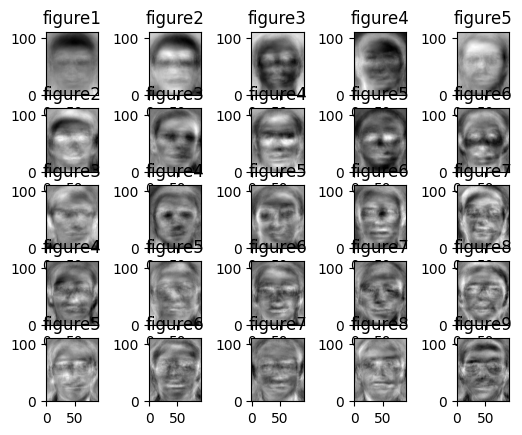

In [ ]:
figure, axs = plt.subplots(5, 5)
count = 0
count1 = 0
for i in range(25):
  pic_array = np.flip((V[i]))
  fig = pic_array.reshape((112,92))
  if count1%5==0 and count1!=0:
    count1=0
    count = count+1;
  axs[count,count1].imshow(fig,origin="lower",cmap="gray")
  axs[count,count1].set_title(f'figure{count+count1+1}')
  count1=count1+1;

**What do you say from eigen faces and what do they reveal?**

eigen face is not the face of of a actual person, it is direction at which most of images have its components along these directions.

so, these donot look like human faces rather they are looking like ghost faces.

every image of person can be represented close to linear combination of above eigen faces.

so, these are principle components and each principle is independent of the other.


The eigen faces looks like ghost faces.

sorting the variance in descending order and plotting them
we know that variance eigen value of XTX/N
so, eigen values of XTX is eig(XTX)/N

<function matplotlib.pyplot.show(close=None, block=None)>

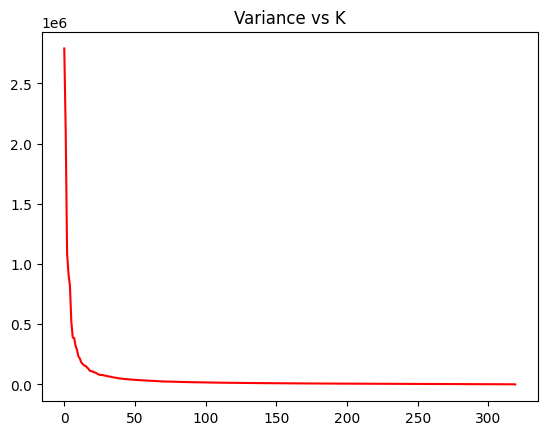

In [ ]:
variance = [];
for i in range(len(S)):
  c_n = S[i]*S[i]/len(centered_train)
  variance.append(c_n)
x = np.arange(len(S))
y = np.array(variance)
plt.plot(x,y,color='red')
plt.title('Variance vs K')
plt.show

finding total variance

In [ ]:
total_variance = 0;
for i in range(len(S)):
  c_n = S[i]*S[i]/len(centered_train)
  total_variance = total_variance+(c_n)
print(total_variance)

16005088.933164047


finding the value of K for which variance is just more than 95% of the total variance

In [ ]:
k = 0;
variance = 0
for i in range(len(S)):
  c_n = S[i]*S[i]/len(centered_train)
  variance = variance+(c_n)
  if variance>0.95*total_variance:
    k = i+1
    break
print(k)
# k = 6
# k = 10

164


**The value of k is 164**

**the value of d is 320**

**because the eigen values after that 320 are all zeros.**

appending first 164 eigen vectors to form principal components

In [ ]:
PCA = []
for i in range(k):
  PCA.append(V[i])
PCA = np.array(PCA)

In [ ]:
print(np.sum(np.square(abs(PCA[0]))))

0.9999999999999992


finding the projections of the centered train data on principle components

In [ ]:
projection = centered_train@PCA.transpose()
projected_centered_train = np.zeros(centered_train.shape)
for j in range(len(centered_train)):
  for i in range(len(PCA)):
    projected_centered_train[j]=projected_centered_train[j]+projection[j,i]*PCA[i]

Reconstructing one of the train image from the projections along principle components

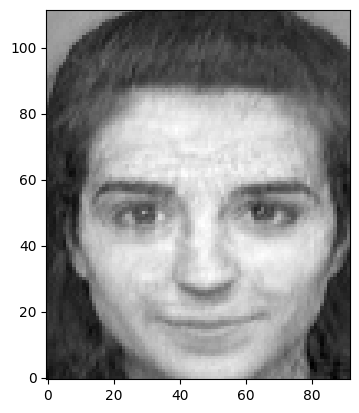

In [ ]:
  pic_array = np.flip(projected_centered_train[10]+mean_image)
  fig = pic_array.reshape((112,92))
  plt.imshow(fig,origin="lower",cmap="gray")

finding projected_centered test with the eigen faces

In [ ]:
projection_test = centered_test@PCA.transpose()
projected_centered_test = np.zeros(centered_test.shape)
for j in range(len(centered_test)):
  for i in range(len(PCA)):
    projected_centered_test[j]=projected_centered_test[j]+projection_test[j,i]*PCA[i]


finding the projections of the centered test data on principle components

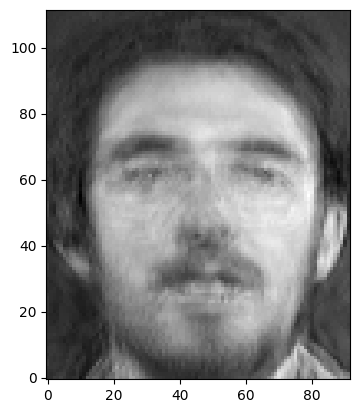

In [ ]:
  pic_array = np.flip(projected_centered_test[4]+mean_image)
  fig = pic_array.reshape((112,92))
  plt.imshow(fig,origin="lower",cmap="gray")

defining error function to use in future

In [ ]:
def error(A,B):
  return np.sum(np.square(A-B))

for each test sample projections finding the close projection in train sample using min square error then labelling it with the same label as close train sample

In [ ]:
labels_for_test=[];
labels_test_train = [];
for i in range(len(projection_test)):
  reconstruction_error = [];
  for j in range(len(projection)):
    reconstruction_error.append(error(projection_test[i],projection[j]))
  minimum_index = np.argmin(reconstruction_error)
  labels_for_test.append(minimum_index//8)
  labels_test_train.append(minimum_index)

In [ ]:
print(labels_for_test)

[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 34, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39]


printing closest train image for every test image

In [ ]:

for i in range(len(labels_for_test)):
  figure, axs = plt.subplots(1, 2,figsize=(3,1.5))
  pic_array = np.flip(test_mat[i])
  fig = pic_array.reshape((112,92))
  axs[0].imshow(fig,origin="lower",cmap="gray")
  axs[0].set_title(f'test_sample{i}')
  pic_array = np.flip(train_mat[labels_test_train[i]])
  fig = pic_array.reshape((112,92))
  axs[1].imshow(fig,origin="lower",cmap="gray")
  axs[1].set_title(f'closest_train_sample{i+1}')

finding true labels for test_samples from mat2

In [ ]:
true_labels_test = {}
count2 = 0;
for i in mat2['labels'][0]:
  true_labels_test[count2] = i;
  count2 = count2+1;
print(true_labels_test)

{0: 0, 1: 0, 2: 1, 3: 1, 4: 2, 5: 2, 6: 3, 7: 3, 8: 4, 9: 4, 10: 5, 11: 5, 12: 6, 13: 6, 14: 7, 15: 7, 16: 8, 17: 8, 18: 9, 19: 9, 20: 10, 21: 10, 22: 11, 23: 11, 24: 12, 25: 12, 26: 13, 27: 13, 28: 14, 29: 14, 30: 15, 31: 15, 32: 16, 33: 16, 34: 17, 35: 17, 36: 18, 37: 18, 38: 19, 39: 19, 40: 20, 41: 20, 42: 21, 43: 21, 44: 22, 45: 22, 46: 23, 47: 23, 48: 24, 49: 24, 50: 25, 51: 25, 52: 26, 53: 26, 54: 27, 55: 27, 56: 28, 57: 28, 58: 29, 59: 29, 60: 30, 61: 30, 62: 31, 63: 31, 64: 32, 65: 32, 66: 33, 67: 33, 68: 34, 69: 34, 70: 35, 71: 35, 72: 36, 73: 36, 74: 37, 75: 37, 76: 38, 77: 38, 78: 39, 79: 39}


calculating accuracy

In [ ]:
count = 0
for i in range(len(true_labels_test)):
  if true_labels_test[i] == labels_for_test[i]:
    count = count + 1
print(f'Accuracy = {(count/len(labels_for_test))*100}')

Accuracy = 98.75


Accuracy vs K

In the above code by changing the value of k one can observe accuracy by rerunning the code

for k = 6 the accuracy is 88.75

for k = 10 the accuracy is 93.75

for k =164 the accuracy is 98.75

for k = 300 the accuracy is 98.75

The accuracy is increasing till we increase the value of k from o to 164 after that increasing the value of even till max value doesnot increse the accuracy.

In [ ]:
!pwd


/content


In [ ]:
!jupyter nbconvert '/content/PCA_assignment (2).ipynb' --to html

[NbConvertApp] Converting notebook /content/PCA_assignment (2).ipynb to html
[NbConvertApp] Writing 5659046 bytes to /content/PCA_assignment (2).html
